# 在一个难数据集上应用 AdaBoost

**说明:**

将 `horseColicTraining2.txt` 和 `horseColicTest2.txt` 放在当前目录下。

In [1]:
from numpy import *

## 单层决策树生成的函数

In [2]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):#just classify the data
    retArray = ones((shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray
    

def buildStump(dataArr,classLabels,D):
    dataMatrix = mat(dataArr); labelMat = mat(classLabels).T
    m,n = shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = mat(zeros((m,1)))
    minError = inf #init error sum, to +infinity
    for i in range(n):#loop over all dimensions
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max();
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):#loop over all range in current dimension
            for inequal in ['lt', 'gt']: #go over less than and greater than
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)#call stump classify with i, j, lessThan
                errArr = mat(ones((m,1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr  #calc total error multiplied by D
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst

## 基于单层决策树的 AdaBoost 训练过程

In [3]:
def adaBoostTrainDS(dataArr,classLabels,numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m)   #init D to all equal
    aggClassEst = mat(zeros((m,1)))
    for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)#build Stump
        print("D:",D.T)
        alpha = float(0.5*log((1.0-error)/max(error,1e-16)))#calc alpha, throw in max(error,eps) to account for error=0
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                  #store Stump Params in Array
        print("classEst: ",classEst.T)
        expon = multiply(-1*alpha*mat(classLabels).T,classEst) #exponent for D calc, getting messy
        D = multiply(D,exp(expon))                              #Calc New D for next iteration
        D = D/D.sum()
        #calc training error of all classifiers, if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        print("aggClassEst: ",aggClassEst.T)
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total error: ",errorRate)
        if errorRate == 0.0: break
    return weakClassArr

## 自适应数据加载函数

In [4]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [5]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')

## 使用 AdaBoost 函数进行分类

In [6]:
classifierArr = adaBoostTrainDS(datArr, labelArr, 50)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 4, thresh 57.60, thresh ineqal: lt, the weighted error is 0.486
split: dim 4, thresh 57.60, thresh ineqal: gt, the weighted error is 0.514
split: dim 4, thresh 67.20, thresh ineqal: lt, the weighted error is 0.502
split: dim 4, thresh 67.20, thresh ineqal: gt, the weighted error is 0.498
split: dim 4, thresh 76.80, thresh ineqal: lt, the weighted error is 0.500
split: dim 4, thresh 76.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 4, thresh 86.40, thresh ineqal: lt, the weighted error is 0.490
split: dim 4, thresh 86.40, thresh ineqal: gt, the weighted error is 0.510
split: dim 4, thresh 96.00, thresh ineqal: lt, the weighted error is 0.494
split: dim 4, thresh 96.00, thresh ineqal: gt, the weighted error is 0.506
split: dim 5, thresh -0.40, thresh ineqal: lt, the weighted error is 0.506
split: dim 5, thresh -0.40, thresh ineqal: gt, the weighted error is 0.494
split: dim 5, thresh 0.00, thresh ineqal: lt, the weighted error is 0.468
split: dim 5, thresh 0.00,

split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.568
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.444
split: dim 17, thresh 30.00, thresh ineqal: gt, the weighted error is 0.556
split: dim 17, thresh 37.50, thresh ineqal: lt, the weighted error is 0.464
split: dim 17, thresh 37.50, thresh ineqal: gt, the weighted error is 0.536
split: dim 17, thresh 45.00, thresh ineqal: lt, the weighted error is 0.520
split: dim 17, thresh 45.00, thresh ineqal: gt, the weighted error is 0.480
split: dim 17, thresh 52.50, thresh ineqal: lt, the weighted error is 0.551
split: dim 17, thresh 52.50, thresh ineqal: gt, the weighted error is 0.449
split: dim 17, thresh 60.00, thresh ineqal: lt, the weighted error is 0.554
split: dim 17, thresh 60.00, thresh ineqal: gt, the weighted error is 0.446
split: dim 17, thresh 67.50, thresh ineqal: lt, the weighted error is 0.535
split: dim 17, thresh 67.50, thresh ineqal: gt, the weighted error is 0.465
split: dim 1

split: dim 8, thresh 0.00, thresh ineqal: gt, the weighted error is 0.531
split: dim 8, thresh 0.30, thresh ineqal: lt, the weighted error is 0.469
split: dim 8, thresh 0.30, thresh ineqal: gt, the weighted error is 0.531
split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.469
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.531
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.469
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.531
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.501
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.499
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.501
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.499
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.501
split: dim 8, thresh 1.80, thresh ineqal: gt, the weighted error is 0.499
split: dim 8, thresh 2.10, thresh ineq

split: dim 14, thresh 0.00, thresh ineqal: gt, the weighted error is 0.470
split: dim 14, thresh 0.75, thresh ineqal: lt, the weighted error is 0.530
split: dim 14, thresh 0.75, thresh ineqal: gt, the weighted error is 0.470
split: dim 14, thresh 1.50, thresh ineqal: lt, the weighted error is 0.521
split: dim 14, thresh 1.50, thresh ineqal: gt, the weighted error is 0.479
split: dim 14, thresh 2.25, thresh ineqal: lt, the weighted error is 0.506
split: dim 14, thresh 2.25, thresh ineqal: gt, the weighted error is 0.494
split: dim 14, thresh 3.00, thresh ineqal: lt, the weighted error is 0.513
split: dim 14, thresh 3.00, thresh ineqal: gt, the weighted error is 0.487
split: dim 14, thresh 3.75, thresh ineqal: lt, the weighted error is 0.501
split: dim 14, thresh 3.75, thresh ineqal: gt, the weighted error is 0.499
split: dim 14, thresh 4.50, thresh ineqal: lt, the weighted error is 0.485
split: dim 14, thresh 4.50, thresh ineqal: gt, the weighted error is 0.515
split: dim 14, thresh 5.2

split: dim 4, thresh 86.40, thresh ineqal: lt, the weighted error is 0.494
split: dim 4, thresh 86.40, thresh ineqal: gt, the weighted error is 0.506
split: dim 4, thresh 96.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 4, thresh 96.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 5, thresh -0.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 5, thresh -0.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 5, thresh 0.00, thresh ineqal: lt, the weighted error is 0.462
split: dim 5, thresh 0.00, thresh ineqal: gt, the weighted error is 0.538
split: dim 5, thresh 0.40, thresh ineqal: lt, the weighted error is 0.462
split: dim 5, thresh 0.40, thresh ineqal: gt, the weighted error is 0.538
split: dim 5, thresh 0.80, thresh ineqal: lt, the weighted error is 0.462
split: dim 5, thresh 0.80, thresh ineqal: gt, the weighted error is 0.538
split: dim 5, thresh 1.20, thresh ineqal: lt, the weighted error is 0.504
split: dim 5, thresh 1.20, thres

split: dim 11, thresh -0.40, thresh ineqal: lt, the weighted error is 0.512
split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.488
split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.483
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.517
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.483
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.517
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.483
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.517
split: dim 11, thresh 1.20, thresh ineqal: lt, the weighted error is 0.525
split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.475
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.525
split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.475
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.524
split: dim 11, thresh 2

split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.484
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.516
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.484
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.516
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.522
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.478
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.522
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.478
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.522
split: dim 8, thresh 1.80, thresh ineqal: gt, the weighted error is 0.478
split: dim 8, thresh 2.10, thresh ineqal: lt, the weighted error is 0.514
split: dim 8, thresh 2.10, thresh ineqal: gt, the weighted error is 0.486
split: dim 8, thresh 2.40, thresh ineqal: lt, the weighted error is 0.514
split: dim 8, thresh 2.40, thresh ineq

split: dim 19, thresh 2.40, thresh ineqal: gt, the weighted error is 0.494
split: dim 19, thresh 2.70, thresh ineqal: lt, the weighted error is 0.506
split: dim 19, thresh 2.70, thresh ineqal: gt, the weighted error is 0.494
split: dim 19, thresh 3.00, thresh ineqal: lt, the weighted error is 0.486
split: dim 19, thresh 3.00, thresh ineqal: gt, the weighted error is 0.514
split: dim 20, thresh -1.01, thresh ineqal: lt, the weighted error is 0.514
split: dim 20, thresh -1.01, thresh ineqal: gt, the weighted error is 0.486
split: dim 20, thresh 0.00, thresh ineqal: lt, the weighted error is 0.503
split: dim 20, thresh 0.00, thresh ineqal: gt, the weighted error is 0.497
split: dim 20, thresh 1.01, thresh ineqal: lt, the weighted error is 0.510
split: dim 20, thresh 1.01, thresh ineqal: gt, the weighted error is 0.490
split: dim 20, thresh 2.02, thresh ineqal: lt, the weighted error is 0.484
split: dim 20, thresh 2.02, thresh ineqal: gt, the weighted error is 0.516
split: dim 20, thresh 3

split: dim 4, thresh 86.40, thresh ineqal: gt, the weighted error is 0.527
split: dim 4, thresh 96.00, thresh ineqal: lt, the weighted error is 0.476
split: dim 4, thresh 96.00, thresh ineqal: gt, the weighted error is 0.524
split: dim 5, thresh -0.40, thresh ineqal: lt, the weighted error is 0.524
split: dim 5, thresh -0.40, thresh ineqal: gt, the weighted error is 0.476
split: dim 5, thresh 0.00, thresh ineqal: lt, the weighted error is 0.487
split: dim 5, thresh 0.00, thresh ineqal: gt, the weighted error is 0.513
split: dim 5, thresh 0.40, thresh ineqal: lt, the weighted error is 0.487
split: dim 5, thresh 0.40, thresh ineqal: gt, the weighted error is 0.513
split: dim 5, thresh 0.80, thresh ineqal: lt, the weighted error is 0.487
split: dim 5, thresh 0.80, thresh ineqal: gt, the weighted error is 0.513
split: dim 5, thresh 1.20, thresh ineqal: lt, the weighted error is 0.504
split: dim 5, thresh 1.20, thresh ineqal: gt, the weighted error is 0.496
split: dim 5, thresh 1.60, thresh

split: dim 2, thresh 20.40, thresh ineqal: gt, the weighted error is 0.502
split: dim 2, thresh 24.48, thresh ineqal: lt, the weighted error is 0.498
split: dim 2, thresh 24.48, thresh ineqal: gt, the weighted error is 0.502
split: dim 2, thresh 28.56, thresh ineqal: lt, the weighted error is 0.498
split: dim 2, thresh 28.56, thresh ineqal: gt, the weighted error is 0.502
split: dim 2, thresh 32.64, thresh ineqal: lt, the weighted error is 0.498
split: dim 2, thresh 32.64, thresh ineqal: gt, the weighted error is 0.502
split: dim 2, thresh 36.72, thresh ineqal: lt, the weighted error is 0.486
split: dim 2, thresh 36.72, thresh ineqal: gt, the weighted error is 0.514
split: dim 2, thresh 40.80, thresh ineqal: lt, the weighted error is 0.476
split: dim 2, thresh 40.80, thresh ineqal: gt, the weighted error is 0.524
split: dim 3, thresh -18.40, thresh ineqal: lt, the weighted error is 0.524
split: dim 3, thresh -18.40, thresh ineqal: gt, the weighted error is 0.476
split: dim 3, thresh 0.

split: dim 1, thresh 8.20, thresh ineqal: lt, the weighted error is 0.520
split: dim 1, thresh 8.20, thresh ineqal: gt, the weighted error is 0.480
split: dim 1, thresh 9.00, thresh ineqal: lt, the weighted error is 0.494
split: dim 1, thresh 9.00, thresh ineqal: gt, the weighted error is 0.506
split: dim 2, thresh -4.08, thresh ineqal: lt, the weighted error is 0.506
split: dim 2, thresh -4.08, thresh ineqal: gt, the weighted error is 0.494
split: dim 2, thresh 0.00, thresh ineqal: lt, the weighted error is 0.487
split: dim 2, thresh 0.00, thresh ineqal: gt, the weighted error is 0.513
split: dim 2, thresh 4.08, thresh ineqal: lt, the weighted error is 0.487
split: dim 2, thresh 4.08, thresh ineqal: gt, the weighted error is 0.513
split: dim 2, thresh 8.16, thresh ineqal: lt, the weighted error is 0.487
split: dim 2, thresh 8.16, thresh ineqal: gt, the weighted error is 0.513
split: dim 2, thresh 12.24, thresh ineqal: lt, the weighted error is 0.487
split: dim 2, thresh 12.24, thresh 

split: dim 20, thresh 9.09, thresh ineqal: lt, the weighted error is 0.493
split: dim 20, thresh 9.09, thresh ineqal: gt, the weighted error is 0.507
split: dim 20, thresh 10.10, thresh ineqal: lt, the weighted error is 0.488
split: dim 20, thresh 10.10, thresh ineqal: gt, the weighted error is 0.512
D: [[ 0.00332003  0.00805265  0.00142841  0.00451339  0.00350272  0.00113833
   0.0016915   0.01116673  0.00273404  0.0020007   0.00546126  0.00167078
   0.00111487  0.0079184   0.00171367  0.00331587  0.00099306  0.00392015
   0.00390712  0.00721987  0.00390566  0.00066811  0.0014025   0.00120402
   0.00285972  0.00465152  0.00400395  0.00220166  0.0058657   0.00045439
   0.00221147  0.00537121  0.00169073  0.00282879  0.00578276  0.00091963
   0.00376104  0.00411414  0.00088259  0.00542259  0.00075028  0.00327626
   0.00256726  0.00224989  0.0013454   0.00178238  0.01350419  0.00083986
   0.00230871  0.00110391  0.00119703  0.00686136  0.00124496  0.00282579
   0.00396544  0.00513674  0.

split: dim 8, thresh 0.00, thresh ineqal: lt, the weighted error is 0.519
split: dim 8, thresh 0.00, thresh ineqal: gt, the weighted error is 0.481
split: dim 8, thresh 0.30, thresh ineqal: lt, the weighted error is 0.519
split: dim 8, thresh 0.30, thresh ineqal: gt, the weighted error is 0.481
split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.519
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.481
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.519
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.481
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.506
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.494
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.506
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.506
split: dim 8, thresh 1.80, thresh ineq

split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.502
split: dim 16, thresh 5.00, thresh ineqal: gt, the weighted error is 0.498
split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.498
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.502
split: dim 17, thresh 0.00, thresh ineqal: lt, the weighted error is 0.475
split: dim 17, thresh 0.00, thresh ineqal: gt, the weighted error is 0.525
split: dim 17, thresh 7.50, thresh ineqal: lt, the weighted error is 0.475
split: dim 17, thresh 7.50, thresh ineqal: gt, the weighted error is 0.525
split: dim 17, thresh 15.00, thresh ineqal: lt, the weighted error is 0.475
split: dim 17, thresh 15.00, thresh ineqal: gt, the weighted error is 0.525
split: dim 17, thresh 22.50, thresh ineqal: lt, the weighted error is 0.475
split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.525
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.492
split: dim 17, thr

## 在测试集上进行测试

In [7]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = mat(datToClass)#do stuff similar to last aggClassEst in adaBoostTrainDS
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],\
                                 classifierArr[i]['thresh'],\
                                 classifierArr[i]['ineq'])#call stump classify
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [8]:
datArr, labelArr = loadDataSet('horseColicTest2.txt')
labelPred = adaClassify(datArr,classifierArr)
errorRate = mean(labelPred != mat(labelArr).T)
print("total error: ",errorRate)

[[ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166

## 绘制 ROC 曲线

In [9]:
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0,1.0) #cursor
    ySum = 0.0 #variable to calculate AUC
    numPosClas = sum(array(classLabels)==1.0)
    yStep = 1/float(numPosClas); xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndicies = predStrengths.argsort()#get sorted index, it's reverse
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    #loop through all the values, drawing a line segment at each point
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0; delY = yStep;
        else:
            delX = xStep; delY = 0;
            ySum += cur[1]
        #draw line from cur to (cur[0]-delX,cur[1]-delY)
        ax.plot([cur[0],cur[0]-delX],[cur[1],cur[1]-delY], c='b')
        cur = (cur[0]-delX,cur[1]-delY)
    ax.plot([0,1],[0,1],'b--')
    plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    ax.axis([0,1,0,1])
    plt.show()
    print("the Area Under the Curve is: ",ySum*xStep)

修改 adaBoostTrainDS 函数最后一行，返回预测的概率值 aggClassEst：

In [10]:
def adaBoostTrainDS(dataArr,classLabels,numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m)   #init D to all equal
    aggClassEst = mat(zeros((m,1)))
    for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)#build Stump
        print("D:",D.T)
        alpha = float(0.5*log((1.0-error)/max(error,1e-16)))#calc alpha, throw in max(error,eps) to account for error=0
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                  #store Stump Params in Array
        print("classEst: ",classEst.T)
        expon = multiply(-1*alpha*mat(classLabels).T,classEst) #exponent for D calc, getting messy
        D = multiply(D,exp(expon))                              #Calc New D for next iteration
        D = D/D.sum()
        #calc training error of all classifiers, if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        print("aggClassEst: ",aggClassEst.T)
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total error: ",errorRate)
        if errorRate == 0.0: break
    return weakClassArr, aggClassEst

对训练样本测试画ROC：

In [11]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArr, aggClassEst = adaBoostTrainDS(datArr, labelArr, 10)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.418
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.582
split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.418
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.679
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.321
split: dim 11, thresh 2.40, thresh ineqal: lt, the weighted error is 0.679
split: dim 11, thresh 2.40, thresh ineqal: gt, the weighted error is 0.321
split: dim 11, thresh 2.80, thresh ineqal: lt, the weighted error is 0.679
split: dim 11, thresh 2.80, thresh ineqal: gt, the weighted error is 0.321
split: dim 11, thresh 3.20, thresh ineqal: lt, the weighted error is 0.635
split: dim 11, thresh 3.20, thresh ineqal: gt, the weighted error is 0.365
split: dim 11, thresh 3.60, thresh ineqal: lt, the weighted error is 0.635
split: dim 11, thresh 3.60, thresh ineqal: gt, the weighted error is 0.365
split: dim 11, thresh 4.0

split: dim 8, thresh 2.40, thresh ineqal: gt, the weighted error is 0.506
split: dim 8, thresh 2.70, thresh ineqal: lt, the weighted error is 0.494
split: dim 8, thresh 2.70, thresh ineqal: gt, the weighted error is 0.506
split: dim 8, thresh 3.00, thresh ineqal: lt, the weighted error is 0.494
split: dim 8, thresh 3.00, thresh ineqal: gt, the weighted error is 0.506
split: dim 9, thresh -0.50, thresh ineqal: lt, the weighted error is 0.506
split: dim 9, thresh -0.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 0.00, thresh ineqal: lt, the weighted error is 0.462
split: dim 9, thresh 0.00, thresh ineqal: gt, the weighted error is 0.538
split: dim 9, thresh 0.50, thresh ineqal: lt, the weighted error is 0.462
split: dim 9, thresh 0.50, thresh ineqal: gt, the weighted error is 0.538
split: dim 9, thresh 1.00, thresh ineqal: lt, the weighted error is 0.526
split: dim 9, thresh 1.00, thresh ineqal: gt, the weighted error is 0.474
split: dim 9, thresh 1.50, thresh in

split: dim 13, thresh 0.00, thresh ineqal: gt, the weighted error is 0.486
split: dim 13, thresh 0.30, thresh ineqal: lt, the weighted error is 0.514
split: dim 13, thresh 0.30, thresh ineqal: gt, the weighted error is 0.486
split: dim 13, thresh 0.60, thresh ineqal: lt, the weighted error is 0.514
split: dim 13, thresh 0.60, thresh ineqal: gt, the weighted error is 0.486
split: dim 13, thresh 0.90, thresh ineqal: lt, the weighted error is 0.514
split: dim 13, thresh 0.90, thresh ineqal: gt, the weighted error is 0.486
split: dim 13, thresh 1.20, thresh ineqal: lt, the weighted error is 0.512
split: dim 13, thresh 1.20, thresh ineqal: gt, the weighted error is 0.488
split: dim 13, thresh 1.50, thresh ineqal: lt, the weighted error is 0.512
split: dim 13, thresh 1.50, thresh ineqal: gt, the weighted error is 0.488
split: dim 13, thresh 1.80, thresh ineqal: lt, the weighted error is 0.512
split: dim 13, thresh 1.80, thresh ineqal: gt, the weighted error is 0.488
split: dim 13, thresh 2.1

split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.447
split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.446
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.554
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.446
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.554
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.446
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.554
split: dim 11, thresh 1.20, thresh ineqal: lt, the weighted error is 0.529
split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.471
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.529
split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.471
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.543
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.457
split: dim 11, thresh 2.

split: dim 7, thresh 3.00, thresh ineqal: lt, the weighted error is 0.563
split: dim 7, thresh 3.00, thresh ineqal: gt, the weighted error is 0.437
split: dim 7, thresh 3.60, thresh ineqal: lt, the weighted error is 0.563
split: dim 7, thresh 3.60, thresh ineqal: gt, the weighted error is 0.437
split: dim 7, thresh 4.20, thresh ineqal: lt, the weighted error is 0.559
split: dim 7, thresh 4.20, thresh ineqal: gt, the weighted error is 0.441
split: dim 7, thresh 4.80, thresh ineqal: lt, the weighted error is 0.559
split: dim 7, thresh 4.80, thresh ineqal: gt, the weighted error is 0.441
split: dim 7, thresh 5.40, thresh ineqal: lt, the weighted error is 0.521
split: dim 7, thresh 5.40, thresh ineqal: gt, the weighted error is 0.479
split: dim 7, thresh 6.00, thresh ineqal: lt, the weighted error is 0.526
split: dim 7, thresh 6.00, thresh ineqal: gt, the weighted error is 0.474
split: dim 8, thresh -0.30, thresh ineqal: lt, the weighted error is 0.474
split: dim 8, thresh -0.30, thresh in

split: dim 8, thresh 3.00, thresh ineqal: gt, the weighted error is 0.543
split: dim 9, thresh -0.50, thresh ineqal: lt, the weighted error is 0.543
split: dim 9, thresh -0.50, thresh ineqal: gt, the weighted error is 0.457
split: dim 9, thresh 0.00, thresh ineqal: lt, the weighted error is 0.477
split: dim 9, thresh 0.00, thresh ineqal: gt, the weighted error is 0.523
split: dim 9, thresh 0.50, thresh ineqal: lt, the weighted error is 0.477
split: dim 9, thresh 0.50, thresh ineqal: gt, the weighted error is 0.523
split: dim 9, thresh 1.00, thresh ineqal: lt, the weighted error is 0.497
split: dim 9, thresh 1.00, thresh ineqal: gt, the weighted error is 0.503
split: dim 9, thresh 1.50, thresh ineqal: lt, the weighted error is 0.497
split: dim 9, thresh 1.50, thresh ineqal: gt, the weighted error is 0.503
split: dim 9, thresh 2.00, thresh ineqal: lt, the weighted error is 0.445
split: dim 9, thresh 2.00, thresh ineqal: gt, the weighted error is 0.555
split: dim 9, thresh 2.50, thresh in

split: dim 8, thresh -0.30, thresh ineqal: lt, the weighted error is 0.529
split: dim 8, thresh -0.30, thresh ineqal: gt, the weighted error is 0.471
split: dim 8, thresh 0.00, thresh ineqal: lt, the weighted error is 0.502
split: dim 8, thresh 0.00, thresh ineqal: gt, the weighted error is 0.498
split: dim 8, thresh 0.30, thresh ineqal: lt, the weighted error is 0.502
split: dim 8, thresh 0.30, thresh ineqal: gt, the weighted error is 0.498
split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.502
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.498
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.502
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.498
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.515
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.485
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.515
split: dim 8, thresh 1.50, thresh in

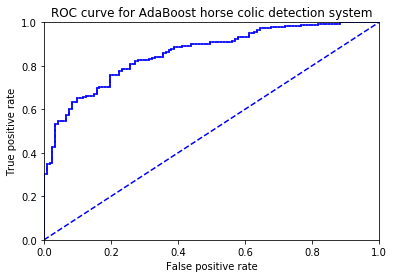

the Area Under the Curve is:  0.8582969635063604


In [12]:
plotROC(aggClassEst.T, labelArr)